In [1]:
# accommodates: the number of guests the rental can accommodate
# bedrooms: number of bedrooms included in the rental
# bathrooms: number of bathrooms included in the rental
# price: nightly price for the rental
# minimum_nights: minimum number of nights a guest can stay for the rental
# Availability 365 : The number of days the facility is available to be booked in the future 365 days
# 'Accommodates','Bedrooms','Bathrooms','Minimum Nights','Latitude','Longitude','Room Type','Bed Type','Availability 365','Guests Included','Price'
# Guests Included
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from tqdm import tqdm

2022-07-01 22:09:39.563867: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
default_dir = '/home/leekwonwoo/previous/PycharmProjects/pythonProject/costPredictionProject/seoul/'
data2 = pd.read_csv(default_dir+'Airbnb Seoul.csv')

In [3]:
data2.info()
# 'Accommodates','Bedrooms','Bathrooms','Minimum Nights','Latitude','Longitude','Room type','Country'
# 'Street','City','Country Code','Has Availability','License','Cancellation Policy','Calculated host listings count','Reviews per Month'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8519 non-null   int64  
 1   room_id               8519 non-null   int64  
 2   host_id               8519 non-null   int64  
 3   room_type             8519 non-null   object 
 4   borough               8519 non-null   object 
 5   neighborhood          8519 non-null   object 
 6   reviews               8519 non-null   int64  
 7   overall_satisfaction  3940 non-null   float64
 8   accommodates          8519 non-null   int64  
 9   bedrooms              8516 non-null   float64
 10  bathrooms             8008 non-null   float64
 11  price                 8519 non-null   int64  
 12  minstay               8295 non-null   float64
 13  latitude              8519 non-null   float64
 14  longitude             8519 non-null   float64
 15  collected            

In [4]:
data2.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,35108,151117,Shared room,Seoul,Changjeon-dong,2,NaN,6,1.0,1.0,20,2.0,37.553134,126.925835,31:54.5
1,1,50657,151117,Private room,Seoul,Seogyo-dong,7,4.5,1,1.0,1.0,46,2.0,37.555893,126.928023,19:52.4
2,2,50809,233925,Entire home/apt,Seoul,Yeongeon-dong,8,5.0,2,0.0,1.0,151,1.0,37.576998,126.997793,55:38.2
3,3,81855,444785,Shared room,Seoul,Waryong-dong,6,4.5,6,1.0,1.0,14,1.0,37.575486,126.990546,12:35.7
4,4,81858,444785,Private room,Seoul,Gwonnong-dong,2,NaN,1,1.0,1.0,35,1.0,37.577231,126.991428,59:50.5


In [5]:
data2.isnull().sum()

Unnamed: 0                 0
room_id                    0
host_id                    0
room_type                  0
borough                    0
neighborhood               0
reviews                    0
overall_satisfaction    4579
accommodates               0
bedrooms                   3
bathrooms                511
price                      0
minstay                  224
latitude                   0
longitude                  0
collected                  0
dtype: int64

In [6]:
idx = data2[(data2['reviews'] == 0) | (data2['overall_satisfaction'] == 0) | (data2['accommodates'] == 0)].index
data2.drop(idx, inplace=True)

<AxesSubplot:xlabel='Unnamed: 0', ylabel='price'>

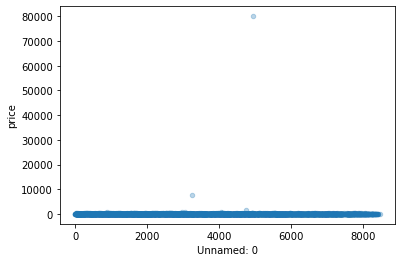

In [7]:
data2.plot(kind = 'scatter', x = 'Unnamed: 0', y ='price', alpha = 0.3,cmap = plt.get_cmap('jet'))

In [8]:
indexes = data2[data2['price']>10000].index
data2.drop(indexes, inplace=True)

<AxesSubplot:xlabel='Unnamed: 0', ylabel='price'>

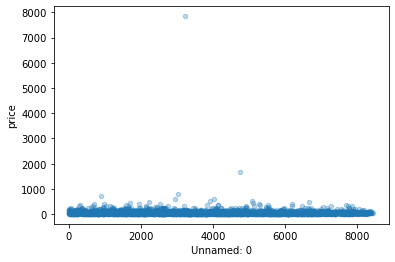

In [9]:
data2.plot(kind = 'scatter', x = 'Unnamed: 0', y ='price', alpha = 0.3,cmap = plt.get_cmap('jet'))

In [10]:
indexes = data2[data2['price']>400].index
data2.drop(indexes, inplace=True)

<AxesSubplot:xlabel='Unnamed: 0', ylabel='price'>

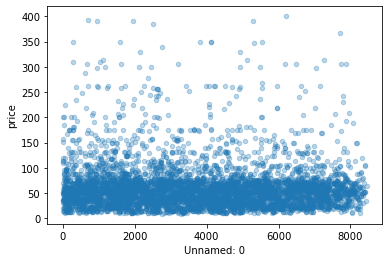

In [11]:
data2.plot(kind = 'scatter', x = 'Unnamed: 0', y ='price', alpha = 0.3,cmap = plt.get_cmap('jet'))

In [12]:
data2_col = data2.columns
null_list = data2.isnull().sum()
for n in range(0,len(null_list),1):
    if null_list[n] != 0:
        print(data2_col[n]+':'+str(null_list[n]))

overall_satisfaction:1577
bedrooms:2
bathrooms:271
minstay:184


In [13]:
if data2.isnull().values.any():
    print('There are missing values')
else:
    print('There is no missing vlaues')

There are missing values


In [14]:
data2 = data2.dropna(axis=0)

In [15]:
if data2.isnull().values.any():
    print('There are missing values')
    raise
else:
    print('There is no missing vlabues')

There is no missing vlabues


<h3>Remove highly correlated features.

# of features before drop: 16
# of features after drop: 15
# of features dropped: 1


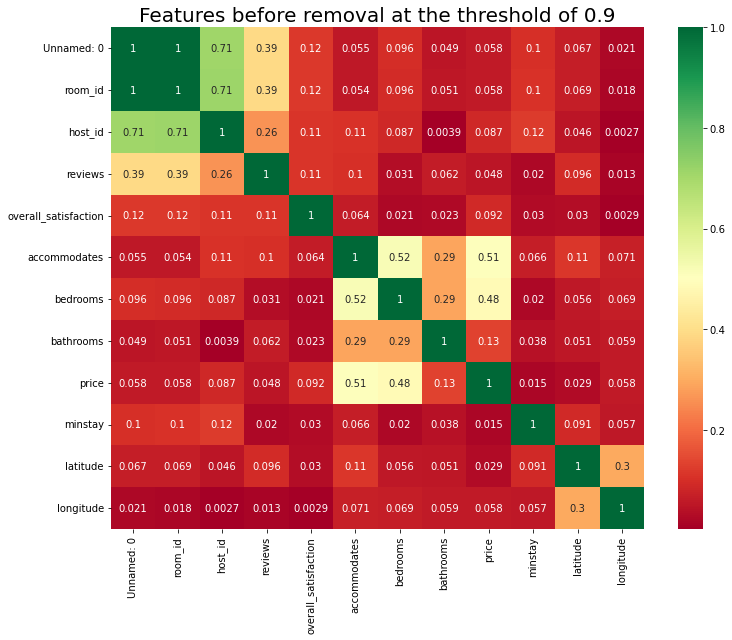

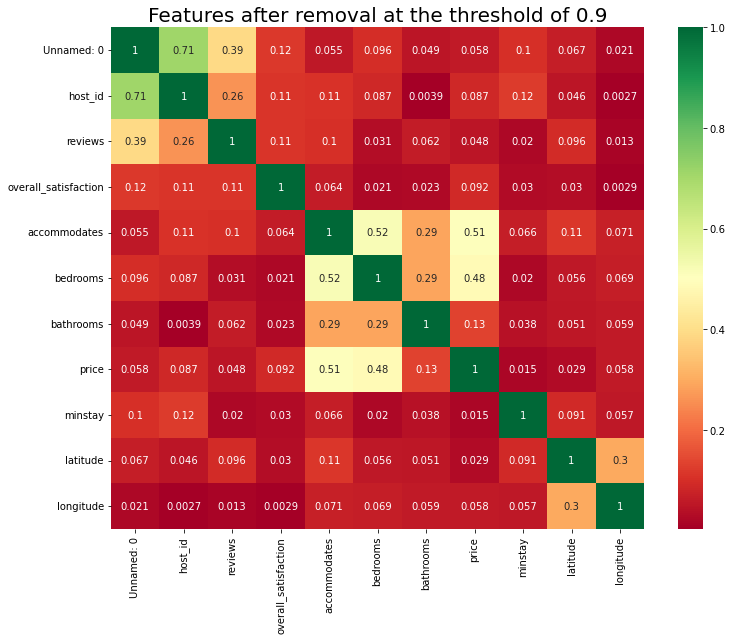

In [16]:
import matplotlib.pyplot as plt

#remove highly correlated features (corr > 90%)
import seaborn as sns

#features
features_pre = data2
_dir = '/home/leekwonwoo/previous/PycharmProjects/pythonProject/costPredictionProject/'
print('# of features before drop:', features_pre.shape[1])

#create correlation matrix
corr_matrix_before = features_pre.corr().abs()

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.90

#plot heatmap before removing highly correlated features
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_before, annot=True,cmap="RdYlGn")
plt.title('Features before removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(_dir + 'corr_matrix_before.png')

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool))

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)]
df_cut_cor = data2.drop(columns = to_drop)

#plot heatmap after removing highly correlated features
corr_matrix_after = df_cut_cor.iloc[:,:].corr().abs()
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_after, annot=True,cmap="RdYlGn")
plt.title('Features after removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(_dir + 'corr_matrix_after.png')

print('# of features after drop:', features_pre.shape[1]-len(to_drop))
print('# of features dropped:', len(to_drop))

In [17]:
X = data2[['accommodates','bedrooms','bathrooms','minstay','latitude','longitude','room_type']]
y = data2['price']

In [18]:
X.shape

(3623, 7)

In [19]:
y.shape

(3623,)

<h3>Encoding

In [20]:
from sklearn.model_selection import train_test_split
# One-hot Encoding
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)
X = encoder.fit_transform(X)

In [21]:
X.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,room_type_Private room,room_type_Entire home/apt,room_type_Shared room
1,1,1.0,1.0,2.0,37.555893,126.928023,1,0,0
2,2,0.0,1.0,1.0,37.576998,126.997793,0,1,0
3,6,1.0,1.0,1.0,37.575486,126.990546,0,0,1
5,2,1.0,1.0,1.0,37.577029,126.990747,1,0,0
10,4,0.0,1.0,2.0,37.577566,126.996916,0,1,0


<h3>Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [23]:
X.head()

,0,1,2,3,4,5,6,7,8
0,-1.100484,-0.110275,-0.246762,0.195005,0.354461,-0.938387,1.585580,-1.330367,-0.287725
1,-0.718473,-1.317303,-0.246762,-0.558999,1.115540,0.419991,-0.630684,0.751672,-0.287725
2,0.809574,-0.110275,-0.246762,-0.558999,1.061015,0.278896,-0.630684,-1.330367,3.475546
3,-0.718473,-0.110275,-0.246762,-0.558999,1.116658,0.282810,1.585580,-1.330367,-0.287725
4,0.045550,-1.317303,-0.246762,0.195005,1.136023,0.402916,-0.630684,0.751672,-0.287725


In [24]:
X.shape

(3623, 9)

In [25]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [26]:
print(model.feature_importances_)

[0.10424677 0.32580179 0.09997285 0.02644378 0.17121644 0.16074218
 0.01072981 0.0935267  0.00731966]


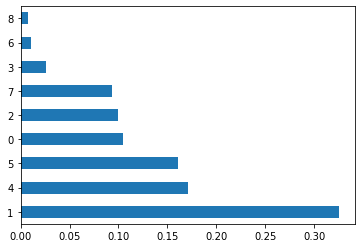

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

<h3>Data Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(2898, 9)
(2898, 9)
(725, 9)
(725,)


<h3>Training using default Hyperparameter

<h4>XGBRegressor

In [29]:
import pickle

xgbr = xgb.XGBRegressor(booster='gblinear')
xgbr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_XGBRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgbr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

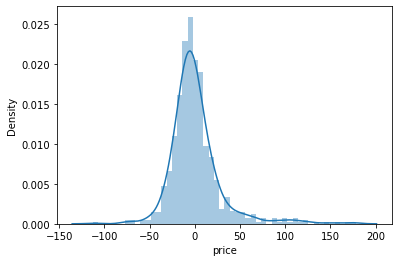

In [30]:
predictions=xgbr.predict(X_test)
sns.distplot(y_test-predictions)

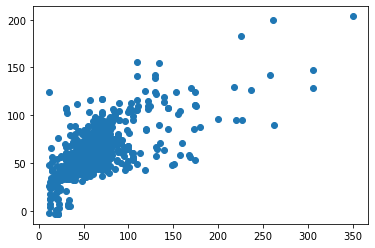

In [31]:
plt.scatter(y_test,predictions)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.39914821756297
MSE: 830.9009594392452
RMSE: 28.825352720118538


<h4>SVR

In [33]:
svr = svm.SVR()
svr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_SVRRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(svr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

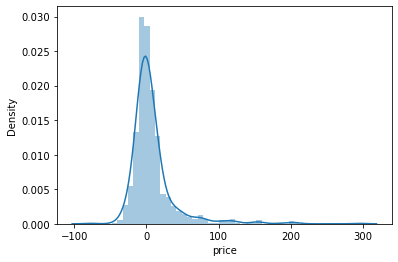

In [34]:
predictions=svr.predict(X_test)
sns.distplot(y_test-predictions)

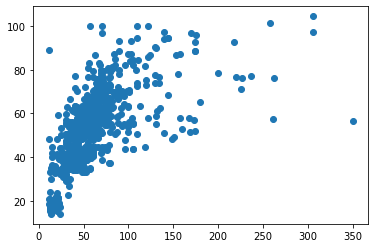

In [35]:
plt.scatter(y_test,predictions)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.268956722514552
MSE: 1081.5507816883119
RMSE: 32.88693937854831


<h4>RandomForestRegressor

In [37]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_RamdomForestRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

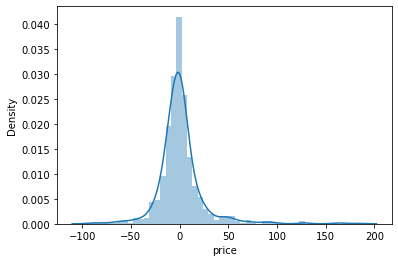

In [38]:
predictions=rfr.predict(X_test)
sns.distplot(y_test-predictions)

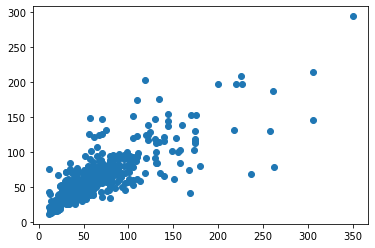

In [39]:
plt.scatter(y_test,predictions)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13.578924137931036
MSE: 557.6112808275861
RMSE: 23.613794291210088


<h4>LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_LinearRegression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

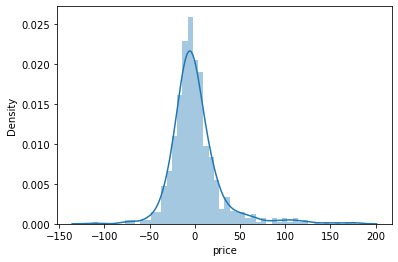

In [43]:
predictions=lr.predict(X_test)
sns.distplot(y_test-predictions)

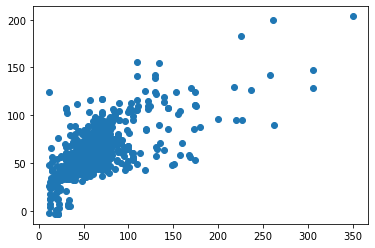

In [44]:
plt.scatter(y_test,predictions)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.399148070768067
MSE: 830.9009568109909
RMSE: 28.825352674529256


<h4>MultiLayerPerceptronRegressor

In [52]:
mlpr = MLPRegressor()
mlpr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_RamdomForestRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(mlpr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

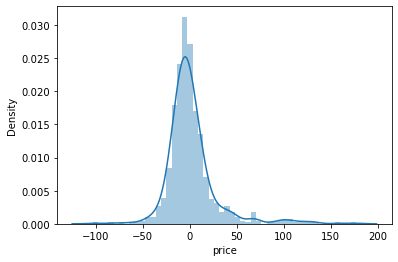

In [53]:
predictions=mlpr.predict(X_test)
sns.distplot(y_test-predictions)

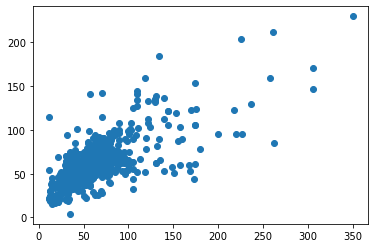

In [54]:
plt.scatter(y_test,predictions)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.293106796789793
MSE: 725.4458701594599
RMSE: 26.934102364093366


<h4>DecisionTreeRegressor

In [56]:
mlpr = DecisionTreeRegressor()
mlpr.fit(X_train,y_train)

# open a file, where you ant to store the data
file = open('before_RamdomForestRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(mlpr, file)

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

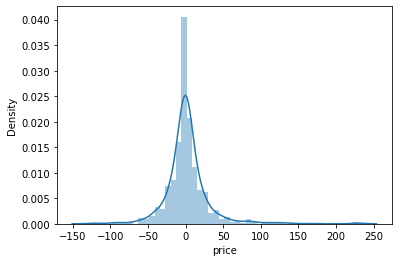

In [57]:
predictions=mlpr.predict(X_test)
sns.distplot(y_test-predictions)

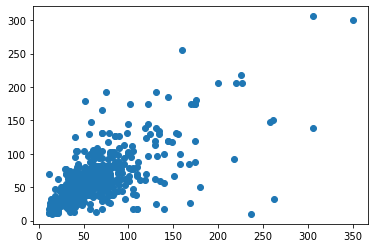

In [58]:
plt.scatter(y_test,predictions)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.84413793103448
MSE: 875.7075862068965
RMSE: 29.592356888340213


<h3>Hyperparameter Tuning

In [60]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [100, 500, 1000]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
learning_rate = [0.1, 0.01]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

random_svr = {
    'C': [1,10,20],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma' : ['auto', 'scale']
}

random_rfr = {
    'n_estimators': n_estimators,
    'criterion' : ['squared_error','absolute_error','poisson'],
    'max_features' : ['sqrt','log2'],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

random_xgbr = {
    'n_estimators': n_estimators,
    'learning_rate' : learning_rate,
    'nthread':[4], #when use hyperthread, xgboost may become slower
    'objective':['reg:linear'],
    'max_depth': [5, 6, 7]
}
random_mlpr = {
    'hidden_layer_sizes' : [(10,), (50,), (100,), (150,)],
    'activation' : ['identity','logistic','tanh','relu'],
    'solver' : ['sgd','adam']
}
random_dtr = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features' : ['sqrt','log2','auto']
}

<h3>XGBRegressor

In [62]:
xgbr = xgb.XGBRegressor(booster='gblinear')
xgbr_model = RandomizedSearchCV(xgbr, random_xgbr, cv=5, verbose=2)
xgbr_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:11:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:05] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.01, max_depth=6, n_estimators=1000, nthread=4, objective=reg:linear; total time=   0.2s
[22:11:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:05] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost

[CV] END learning_rate=0.01, max_depth=6, n_estimators=500, nthread=4, objective=reg:linear; total time=   0.1s
[22:11:06] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:06] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.01, max_depth=6, n_estimators=500, nthread=4, objective=reg:linear; total time=   0.1s
[22:11:06] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:06] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[CV] END learning_rate=0.1, max_depth=7, n_estimators=1000, nthread=4, objective=reg:linear; total time=   0.1s
[22:11:08] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.01, max_depth=7, n_estimators=1000, nthread=4, objective=reg:linear; total time=   0.1s
[22:11:08] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings

[CV] END learning_rate=0.1, max_depth=7, n_estimators=500, nthread=4, objective=reg:linear; total time=   0.1s
[22:11:09] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:09] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, nthread=4, objective=reg:linear; total time=   0.0s
[22:11:09] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:09] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings b

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster='gblinear',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 6, 7],
                                        'n_estimators': [100, 500, 1000],
                                        'nthread': [4],
                                        'objective': ['reg:linear']},
                   verbose=2)

In [63]:
xgbr_model.best_params_

{'objective': 'reg:linear',
 'nthread': 4,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.01}

In [64]:
xgbr_model.best_score_

0.4500986497072158

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

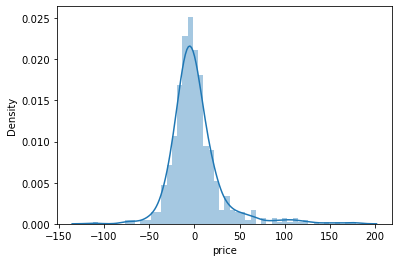

In [65]:
predictions=xgbr_model.predict(X_test)
sns.distplot(y_test-predictions)

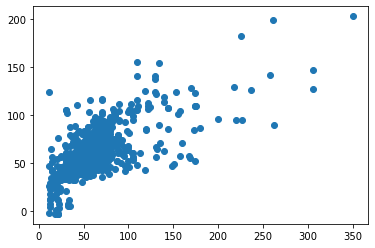

In [66]:
plt.scatter(y_test,predictions)

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.340259741421402
MSE: 831.8471465542847
RMSE: 28.841760462119588


In [68]:
import pickle
# open a file, where you ant to store the data
file = open('XGBRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgbr_model, file)

<h3>SVR

In [69]:
svr = svm.SVR()
svr_model = RandomizedSearchCV(svr, random_svr, cv=5, verbose=2)
svr_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...................C=20, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ...................C=20, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ...................C=20, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ...................C=20, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ...................C=20, gamma=scale, kernel=linear; total time=   0.4s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.5s
[CV] END .....................C=10, gamma=scale,

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [1, 10, 20],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=2)

In [70]:
svr_model.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [71]:
svr_model.best_score_

0.4907817962652836

In [72]:
svr_model = svm.SVR(C= 20, gamma= 'auto', kernel= 'rbf')
svr_model.fit(X_train,y_train)

SVR(C=20, gamma='auto')

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

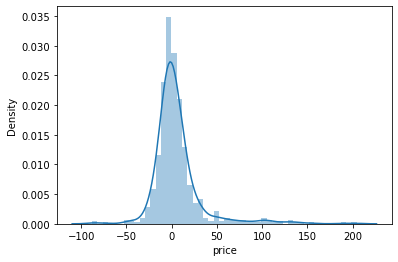

In [73]:
predictions=svr_model.predict(X_test)
sns.distplot(y_test-predictions)

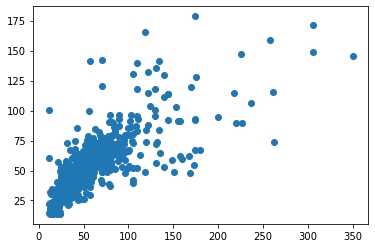

In [74]:
plt.scatter(y_test,predictions)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.225645968487763
MSE: 776.1740509016232
RMSE: 27.859900410834623


In [76]:
# open a file, where you ant to store the data
file = open('SVR_model.pkl', 'wb')

# dump information to that file
pickle.dump(svr_model, file)

<h3>RandomForestRegressor

In [77]:
rfr = RandomForestRegressor()
rfr_model = RandomizedSearchCV(rfr, random_rfr, cv=5, verbose=2)
rfr_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  19.5s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  19.6s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  19.6s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  19.8s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  19.6s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END criterion=absolute_error, max_depth=15, max_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 500, 1000]},
                   verbose=2)

In [78]:
rfr_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'squared_error'}

In [79]:
rfr_model.best_score_

0.6196530982160025

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

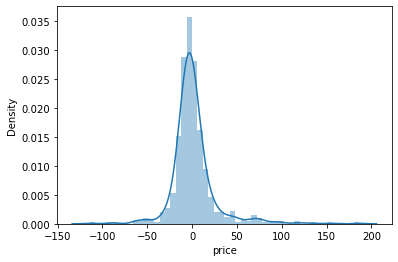

In [80]:
predictions=rfr_model.predict(X_test)
sns.distplot(y_test-predictions)

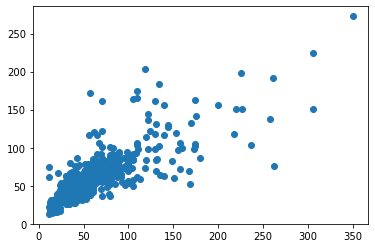

In [81]:
plt.scatter(y_test,predictions)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.105606985296873
MSE: 583.0201090640523
RMSE: 24.14580934787758


In [83]:
# open a file, where you ant to store the data
file = open('RandomForestRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr_model, file)

<h3>LinearRegression

In [84]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

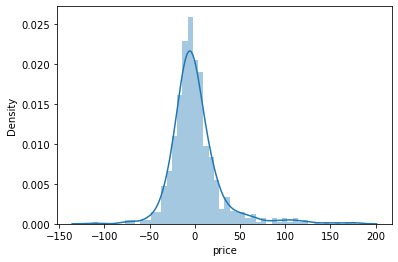

In [85]:
predictions=lr_model.predict(X_test)
sns.distplot(y_test-predictions)

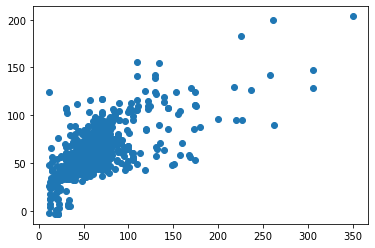

In [86]:
plt.scatter(y_test,predictions)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.399148070768067
MSE: 830.9009568109909
RMSE: 28.825352674529256


In [88]:
# open a file, where you ant to store the data
file = open('LinearRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr_model, file)

<h3> MultilayerPerceptronRegressor

In [89]:
mlpr = MLPRegressor()
mlpr_model = RandomizedSearchCV(mlpr, random_mlpr, cv=5, verbose=2)
mlpr_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.4s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.4s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.4s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.4s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(150,), solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(150,), solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(150,), solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(150,), solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(150,), solver=adam; total time=   0.5s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), solver=sgd; total time=   1.6s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), solver=sgd; total time=   1.6s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), solver=sgd; total time=   1.6s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), solver=sgd; total time=   1.6s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), solver=sgd; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time=   0.1s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(150,), solver=adam; total time=   2.2s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(150,), solver=adam; total time=   2.2s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(150,), solver=adam; total time=   2.2s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(150,), solver=adam; total time=   2.2s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(150,), solver=adam; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=sgd; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=sgd; total time=   0.1s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), solver=adam; total time=   2.8s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), solver=adam; total time=   2.9s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), solver=adam; total time=   2.9s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), solver=adam; total time=   3.0s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), solver=adam; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(10,), solver=sgd; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(10,), solver=sgd; total time=   0.2s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time=   1.3s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time=   1.3s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time=   1.4s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time=   1.3s


/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=MLPRegressor(),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (150,)],
                                        'solver': ['sgd', 'adam']},
                   verbose=2)

In [90]:
mlpr_model.best_params_

{'solver': 'sgd', 'hidden_layer_sizes': (10,), 'activation': 'tanh'}

In [91]:
mlpr_model.best_score_

0.560559300538751

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

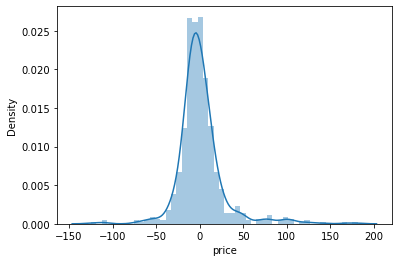

In [92]:
predictions=mlpr_model.predict(X_test)
sns.distplot(y_test-predictions)

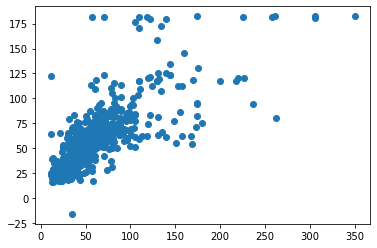

In [93]:
plt.scatter(y_test,predictions)

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.27149823185744
MSE: 722.552492422987
RMSE: 26.88033653849942


In [95]:
# open a file, where you ant to store the data
file = open('MLPRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(mlpr_model, file)

<h3>DecisionTreeRegressor

In [96]:
dtr = DecisionTreeRegressor()
dtr_model = RandomizedSearchCV(dtr, random_dtr, cv=5, verbose=2)
dtr_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END criterion=absolute_error,

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   verbose=2)

In [97]:
dtr_model.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'squared_error'}

In [98]:
dtr_model.best_score_

0.5241579320300971

/home/leekwonwoo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

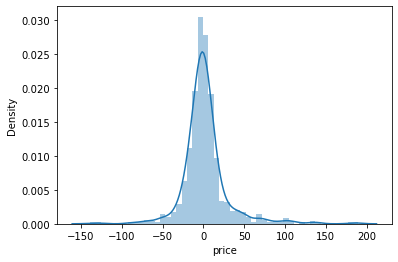

In [99]:
predictions=dtr_model.predict(X_test)
sns.distplot(y_test-predictions)

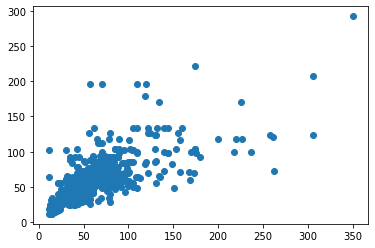

In [100]:
plt.scatter(y_test,predictions)

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.418377338288675
MSE: 783.6982343445391
RMSE: 27.994610808949265


In [102]:
# open a file, where you ant to store the data
file = open('DecisionTreeRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(dtr_model, file)